In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
import scipy.io
import pickle

In [18]:
path = os.path.abspath("../data/03_modelling/dataset_place.csv")

In [19]:
dataset=pd.read_csv(path,index_col=0)

# open a file, where you stored the pickled data
file = open('../data/03_modelling/dict.placing_segments', 'rb')

# dump information to that file
placing_seg = pickle.load(file)

# close the file
file.close()

In [20]:
abs(dataset.corr().time_end).sort_values()[-20:]

T1_1        0.489228
T1_3        0.490203
AD_dd_5     0.495590
T1_4        0.495782
S3_4        0.496224
S2_d_2      0.497436
S1_d_1      0.499615
T1_5        0.501649
S1_dd_1     0.505547
S3_5        0.507898
S3_6        0.519489
E1_d_1      0.527529
S2_d_1      0.553872
AD_dd_4     0.557105
AD_dd_3     0.597200
AD_dd_2     0.629712
AD_dd_1     0.657680
AD_d_5      0.780777
AD_d_6      0.811705
time_end    1.000000
Name: time_end, dtype: float64

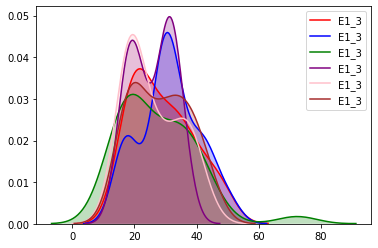

In [4]:
g = sns.kdeplot(dataset["E1_3"][dataset["next_pos"] == 2], color="Red", shade = True)
g = sns.kdeplot(dataset["E1_3"][dataset["next_pos"] == 3], color="blue", shade = True)
g = sns.kdeplot(dataset["E1_3"][dataset["next_pos"] == 4], color="green", shade = True)
g = sns.kdeplot(dataset["E1_3"][dataset["next_pos"] == 5], color="purple", shade = True)
g = sns.kdeplot(dataset["E1_3"][dataset["next_pos"] == 6], color="pink", shade = True)
g = sns.kdeplot(dataset["E1_3"][dataset["next_pos"] == 7], color="brown", shade = True)

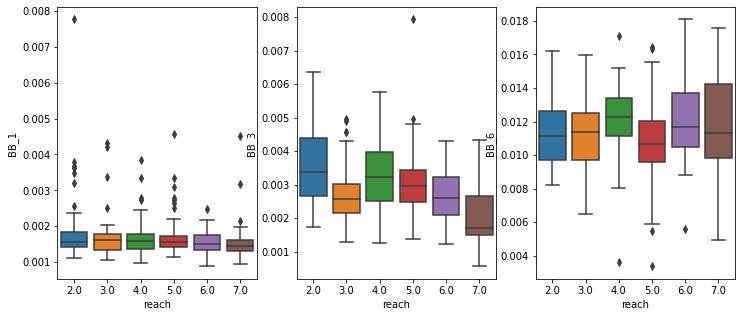

In [5]:
fig = plt.figure(figsize =[25,5])

sig = 'BB'

ax1 = fig.add_subplot(161)
sns.boxplot(x="reach", y = sig+"_1",data = dataset)

ax3 = fig.add_subplot(162)
sns.boxplot(x="reach", y = sig+"_3",data = dataset)

ax2 = fig.add_subplot(163)
sns.boxplot(x="reach", y = sig+"_6",data = dataset)

# plt.close(2)
# plt.close(3)
#plt.tight_layout()

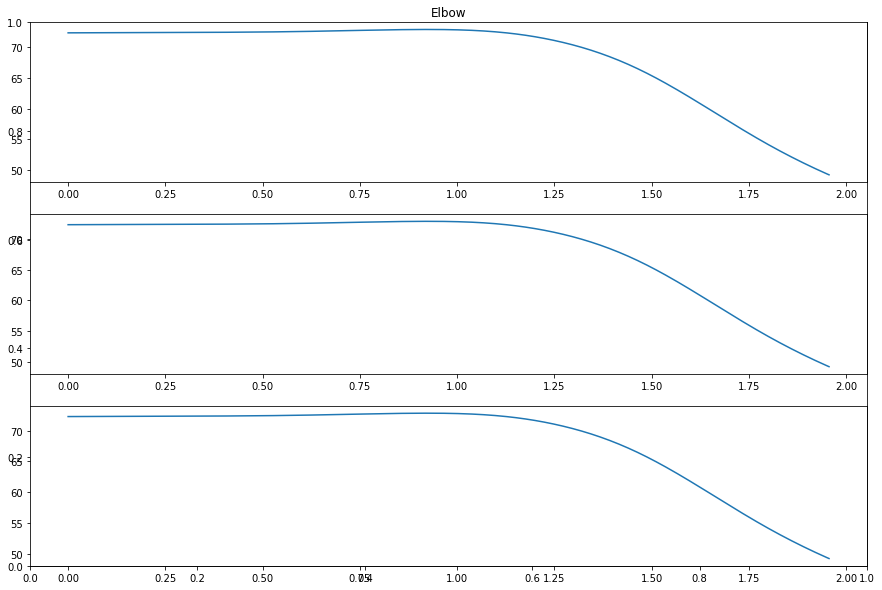

In [6]:
fig = plt.figure(figsize =[15,10])

plt.title('Elbow')

ax1 = fig.add_subplot(311)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].E1)

ax2 = fig.add_subplot(312)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].E1)

ax3 = fig.add_subplot(313)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].E1)

plt.show()

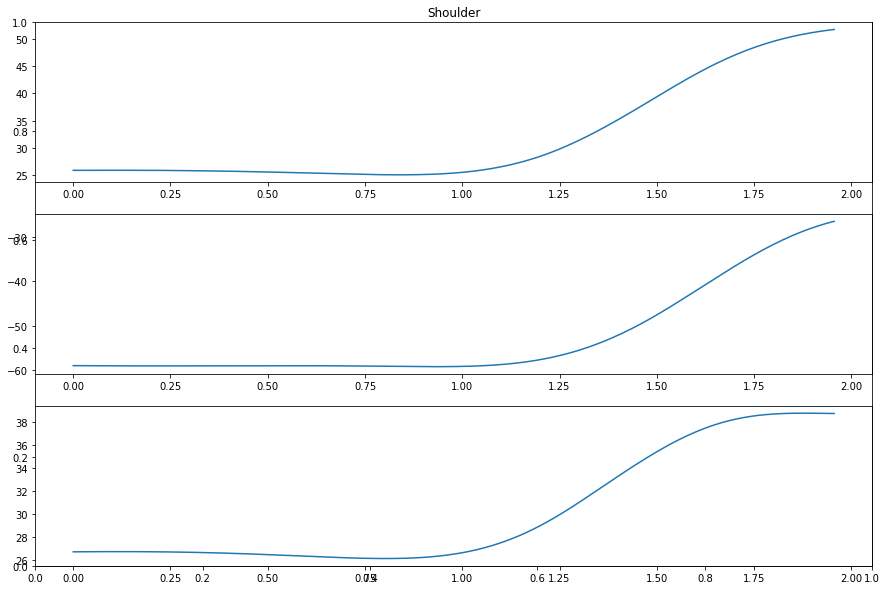

In [7]:
fig = plt.figure(figsize =[15,10])

plt.title('Shoulder')

ax1 = fig.add_subplot(311)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].S1)

ax2 = fig.add_subplot(312)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].S2)

ax3 = fig.add_subplot(313)
plt.plot(reaching_seg[0][5].time, reaching_seg[0][5].S3)

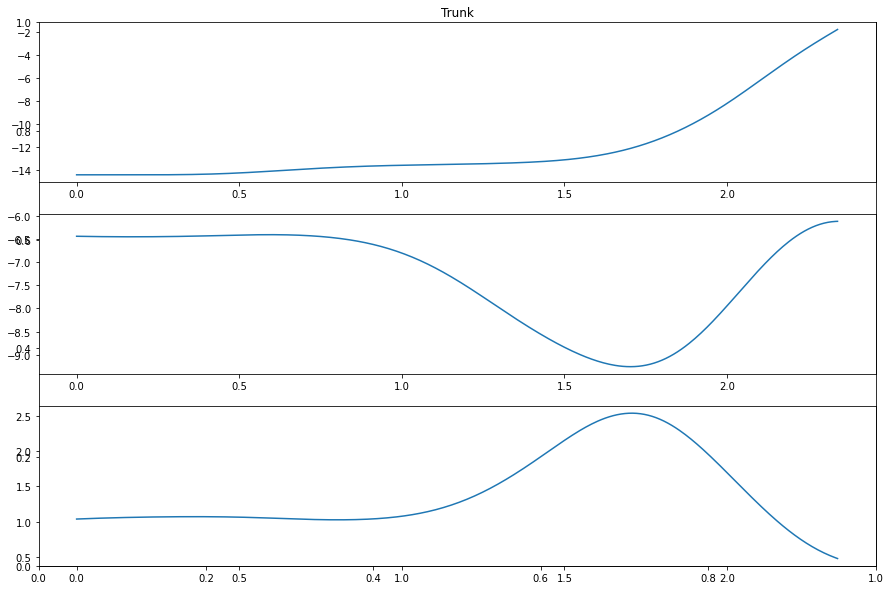

In [8]:
fig = plt.figure(figsize =[15,10])

plt.title('Trunk')

ax1 = fig.add_subplot(311)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].T1)

ax2 = fig.add_subplot(312)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].T2)

ax3 = fig.add_subplot(313)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].T3)

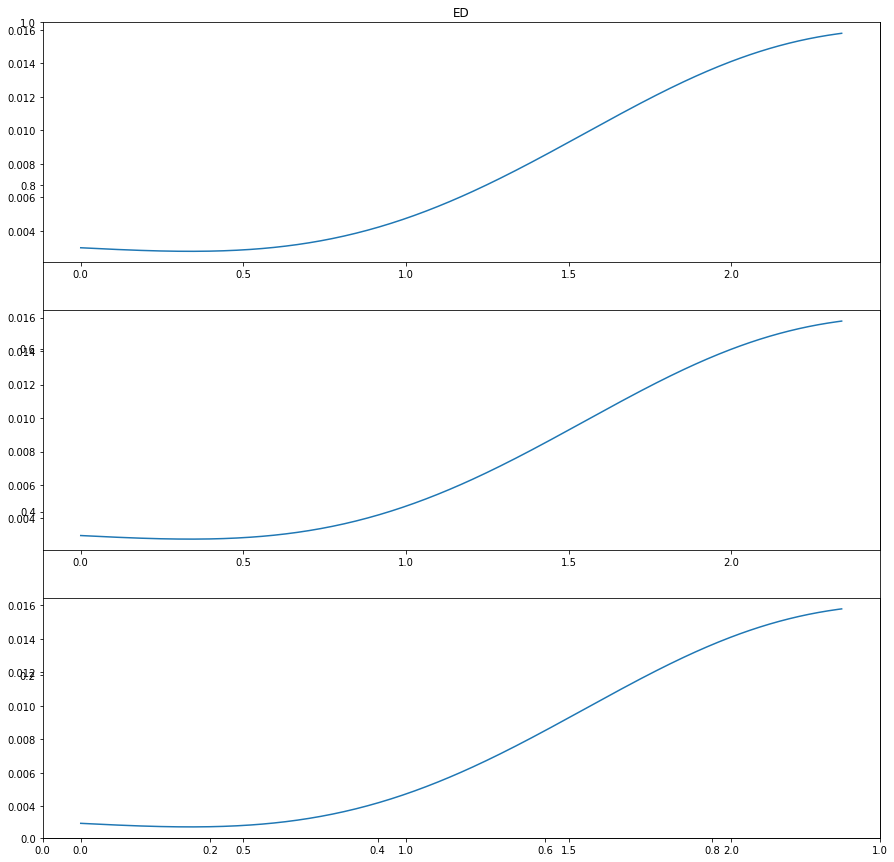

In [9]:
fig = plt.figure(figsize =[15,15])

plt.title('ED')

ax6 = fig.add_subplot(311)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].ED)

ax7 = fig.add_subplot(312)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].ED)

ax8 = fig.add_subplot(313)
plt.plot(reaching_seg[0][15].time, reaching_seg[0][15].ED)

In [12]:
def prepare_time_segment(segments,time_window, reach =1):
    
    if reach ==1:
        command = 'prev_command'
    else:
        command = 'command_start'
        
    df8 = pd.DataFrame()
    df = {}
    df_command = pd.DataFrame()
    df_command2 = pd.DataFrame()

    trials = 3
    k=0

    lst = ['E1','E2','E3','S1','S2','S3','T1','T2','T3','BB','TB','AD','PM','ED']
    
    for sig in lst:

        df[k] = pd.DataFrame()
        for trial in range(0,trials-1):

            for j in range(0,len(segments[trial])):

                if j in segments[trial] and segments[trial][j][command][0] >= 2.0:

                    df[k] = df[k].append(segments[trial][j][segments[trial][j].time<time_window][sig],ignore_index=True)

                    if sig == 'E1':
                        if reach==0:
                            s = pd.Series(np.ones(len(segments[trial][j][segments[trial][j].time<time_window].E1))*segments[trial][j]['prev_command'][0])
                            df_command2 = df_command2.append(s,ignore_index=True)
                            
                        g = pd.Series(np.ones(len(segments[trial][j][segments[trial][j].time<time_window].E1))*segments[trial][j][command][0])
                        
                        df_command = df_command.append(g,ignore_index=True)

        df[k] = df[k].T
        df8 = df8.append(pd.Series(df[k].values.flatten()),ignore_index=True) 
        k=k+1

    t = np.linspace(0,0.006*(np.shape(df[0])[0]-1),np.shape(df[0])[0])
    t = t.round(3)
    h = t

    for i in range(0,np.shape(df[0])[1]-1):
        h = np.append(h,t)

    h.sort()  

    df_command = df_command.T
    p = pd.DataFrame(df_command.values.flatten())

    df8 = df8.T
    df8.columns = lst 

    df8['command'] = p
    df8['time'] = h
    
    if reach ==0:
        df_command2 = df_command2.T
        l = pd.DataFrame(df_command.values.flatten())
        df8['prev_command'] = l
    
    return df8

df8 = prepare_time_segment(placing_seg,0.8,reach=0)

In [13]:
placing_seg[0][1]

,time,E1,E2,E3,S1,S2,S3,T1,T2,T3,...,T2_dd,T3_dd,BB_dd,TB_dd,AD_dd,PM_dd,ED_dd,pressure_dd,command_start,prev_command
0,0.000,27.806646,72.545194,1.433476,66.136506,-14.900362,41.416262,-4.968987,7.561883,1.345490,...,-58.505291,2.978063,-0.017676,-0.039178,-0.035135,0.000351,-0.012898,64.402419,3.0,2.0
1,0.006,27.859396,72.449006,1.369007,66.140014,-14.983194,41.412423,-4.864365,7.625892,1.342121,...,-58.667219,3.136120,-0.017583,-0.039110,-0.034468,0.000341,-0.012818,99.110821,-1.0,-1.0
2,0.012,27.915861,72.354079,1.303580,66.142495,-15.066937,41.409089,-4.761324,7.687784,1.338871,...,-58.801455,3.296408,-0.017487,-0.039034,-0.033809,0.000330,-0.012735,135.088633,-1.0,-1.0
3,0.018,27.975920,72.260416,1.237182,66.144008,-15.151516,41.406292,-4.659895,7.747555,1.335745,...,-58.911564,3.459113,-0.017387,-0.038948,-0.033157,0.000319,-0.012650,92.912922,-1.0,-1.0
4,0.024,28.039450,72.168016,1.169801,66.144607,-15.236863,41.404063,-4.560108,7.805202,1.332750,...,-59.000992,3.624418,-0.017284,-0.038855,-0.032512,0.000307,-0.012563,59.915611,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1.320,25.563065,69.396963,-9.768043,65.415627,-31.824792,48.698775,0.592191,1.595336,1.111968,...,9.017206,9.319041,-0.003606,-0.024231,0.010266,0.000109,-0.008184,17.687489,-1.0,-1.0
221,1.326,25.585047,69.410833,-9.751017,65.408545,-31.839497,48.697747,0.597964,1.609802,1.091821,...,8.571878,9.655182,-0.003897,-0.024238,0.010538,0.000104,-0.008278,25.144353,-1.0,-1.0
222,1.332,25.609148,69.425646,-9.732663,65.401326,-31.855399,48.697131,0.602761,1.624561,1.072033,...,8.132486,9.974293,-0.004190,-0.024238,0.010808,0.000099,-0.008369,16.946519,-1.0,-1.0
223,1.338,25.635431,69.441442,-9.712968,65.393934,-31.872543,48.696910,0.606570,1.639598,1.052615,...,7.704703,10.274813,-0.004485,-0.024231,0.011074,0.000093,-0.008457,19.616901,-1.0,-1.0


In [14]:
df8.prev_command = df8.prev_command.shift(periods = 1,fill_value = 0)

In [15]:
#df8.drop(0,inplace=True)
df8.reset_index(drop=True)

,E1,E2,E3,S1,S2,S3,T1,T2,T3,BB,TB,AD,PM,ED,command,time,prev_command
0,9.018213,47.087316,-3.711590,36.639488,38.720082,23.337617,-13.074641,-10.460597,2.869971,0.017895,0.013139,0.055837,0.003350,0.015541,2.0,0.000,0.0
1,27.806646,72.545194,1.433476,66.136506,-14.900362,41.416262,-4.968987,7.561883,1.345490,0.020681,0.035026,0.056119,0.003144,0.016830,3.0,0.000,2.0
2,23.816731,72.837187,-1.735972,63.312724,-26.789269,43.905719,-1.104535,1.257005,0.281375,0.019620,0.032308,0.046746,0.002904,0.018509,4.0,0.000,3.0
3,14.503952,75.844092,-10.385173,63.742629,-41.297611,51.833044,4.922507,-3.768029,-1.483502,0.026927,0.032733,0.045256,0.003008,0.017405,3.0,0.000,4.0
4,23.198681,74.161624,-3.791927,64.742992,-31.517876,47.928510,1.396913,-0.331428,1.837813,0.022374,0.026796,0.044369,0.002670,0.017204,5.0,0.000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24115,42.535211,67.608931,-5.568466,61.220926,-21.303495,47.274702,-8.996324,-1.859599,4.117602,0.024104,0.017668,0.045342,0.002755,0.016517,5.0,0.798,2.0
24116,26.820484,69.575998,-2.177377,58.138873,-28.712047,43.342934,-4.250731,-3.463790,4.812825,0.018119,0.022991,0.056448,0.002630,0.019728,3.0,0.798,5.0
24117,32.218572,72.602352,-3.829996,56.927791,-31.132172,45.563391,-8.882835,-7.086700,5.463260,0.019136,0.014301,0.038681,0.003048,0.018238,6.0,0.798,3.0
24118,31.055675,69.106107,-5.195227,59.056840,-26.575433,43.909333,-5.348638,-3.137719,5.832567,0.018978,0.021398,0.063128,0.002826,0.019062,2.0,0.798,6.0


In [20]:
def left_right_center(command):
    if command == 2 or command == 5:
        return 'left'
    elif command == 4 or command == 7:
        return 'right'
    else:
        return 'center'
    
def front_back(command):
    if command == 2 or command == 3 or command == 4:
        return 'back'
    else:
        return 'front'

def front_back_change(FB,prev_FB):
    
    if FB == prev_FB :
        if  FB == 'front':
            return 'FF'
        else:
            return 'BB'
    else:
        if prev_FB == 'front':
            return 'FB'
        else:
            return 'BF'
        
def LRC_change(LRC, prev_LRC):
    
    if LRC == prev_LRC :
        return 'S'
    else:
        if prev_LRC == 'left' and LRC == 'right' :
            return 'LR'
        else: #else prev_LRC == 'right' and LRC == 'left':
            return 'RL'
        
df8['LRC'] = df8.apply(lambda x: left_right_center(x['command']),axis=1)
df8['FB'] = df8.apply(lambda x: front_back(x['command']),axis=1)

df8['prev_LRC'] = df8.apply(lambda x: left_right_center(x['prev_command']),axis=1)
df8['prev_FB'] = df8.apply(lambda x: front_back(x['prev_command']),axis=1)

df8['FB_change'] = df8.apply(lambda x: front_back_change(x['FB'],x['prev_FB']),axis=1)
df8['LRC_change'] = df8.apply(lambda x: LRC_change(x['LRC'],x['prev_LRC']),axis=1)

# LF
# LB
# 

In [25]:
df8[df8.prev_command ==2]

,E1,E2,E3,S1,S2,S3,T1,T2,T3,BB,...,ED,command,time,prev_command,LRC,FB,prev_LRC,prev_FB,FB_change,LRC_change
1,27.806646,72.545194,1.433476,66.136506,-14.900362,41.416262,-4.968987,7.561883,1.345490,0.020681,...,0.016830,3.0,0.000,2.0,center,back,left,back,BB,RL
9,32.548534,71.823843,-2.268166,69.974313,-22.212005,45.377103,0.487715,7.310932,3.522195,0.019050,...,0.015479,3.0,0.000,2.0,center,back,left,back,BB,RL
22,29.952644,69.606243,-4.114240,70.786905,-22.528417,46.718885,2.277692,6.321525,4.308583,0.019940,...,0.017671,5.0,0.000,2.0,left,front,left,back,BF,S
25,29.031266,70.897000,-5.458853,71.839982,-23.765585,47.286427,0.573271,9.284055,5.104421,0.018945,...,0.018910,5.0,0.000,2.0,left,front,left,back,BF,S
30,29.383967,72.514547,-2.516828,71.422013,-24.096100,47.938089,-0.770695,8.235144,6.791849,0.017830,...,0.017751,6.0,0.000,2.0,center,front,left,back,BF,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24093,48.326832,66.950307,-7.948924,61.425357,-32.231168,50.189360,-7.224649,0.905507,4.540185,0.020713,...,0.017439,6.0,0.798,2.0,center,front,left,back,BF,RL
24098,27.746041,65.048167,-5.979458,66.403541,-28.091412,50.377663,-0.109407,0.016690,5.663972,0.018391,...,0.018667,3.0,0.798,2.0,center,back,left,back,BB,RL
24104,37.755194,64.753021,-9.902624,63.590830,-36.661421,53.209597,-4.114237,-1.764212,9.694018,0.015893,...,0.015832,7.0,0.798,2.0,right,front,left,back,BF,LR
24115,42.535211,67.608931,-5.568466,61.220926,-21.303495,47.274702,-8.996324,-1.859599,4.117602,0.024104,...,0.016517,5.0,0.798,2.0,left,front,left,back,BF,S


<Figure size 432x288 with 0 Axes>

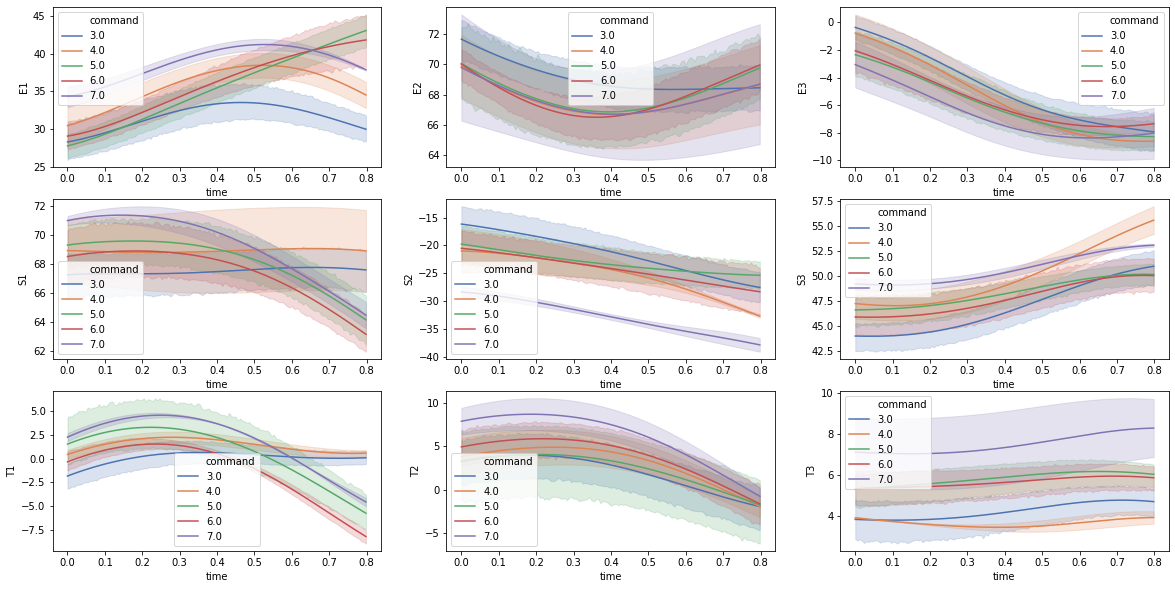

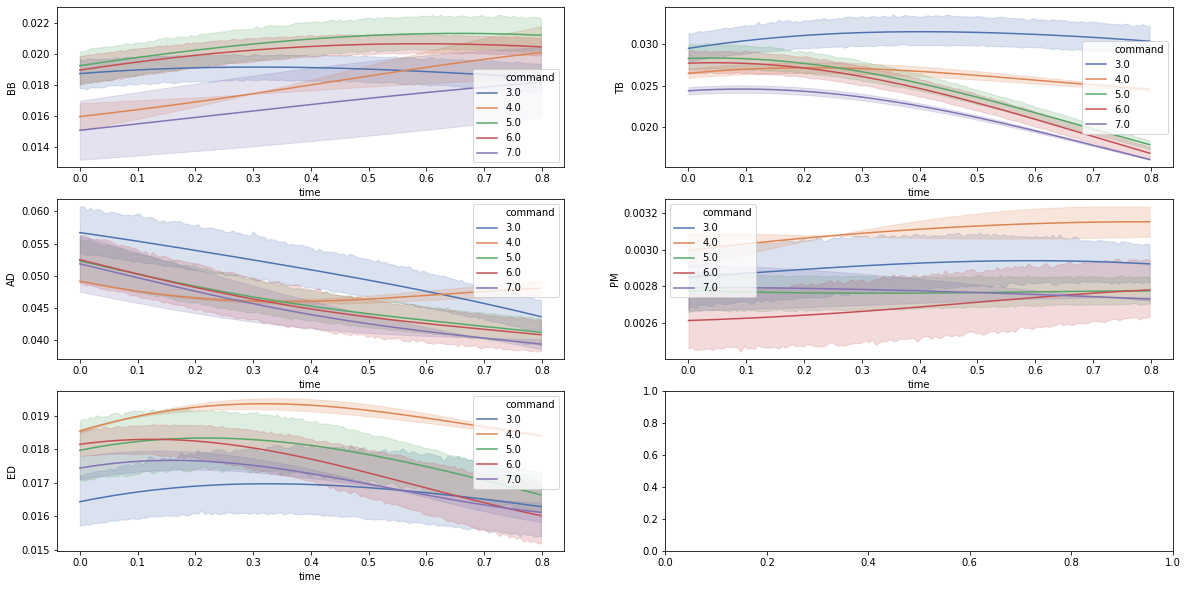

In [27]:
hue = 'command'

df = df8[df8.prev_command ==2]

plt.figure(1)

f, axes = plt.subplots(3,3, figsize=(20,10))

angles = ['E1','E2','E3','S1','S2','S3','T1','T2','T3']

for com in angles:
    com_index = angles.index(com) 
    
    if com_index <3:
        row =0
    elif com_index > 2 and com_index < 6:
        com_index = com_index%3
        row = 1
    elif com_index > 5:
        com_index = com_index%3
        row = 2
        
    sns.lineplot(x= 'time', y = com ,hue=hue,data = df,legend = 'full', palette = 'deep',markers=True, ax=axes[row,com_index]) #axes[0]

plt.figure(2)

ma = ['BB','TB','AD','PM','ED']
f, axes = plt.subplots(3,2, figsize=(20,10))

for com in ma:
    com_index = ma.index(com) 
    
    if com_index <2:
        row =0
    elif com_index > 1 and com_index < 4:
        com_index = com_index%2
        row = 1
    elif com_index > 3:
        com_index = com_index%2
        row = 2
        
    sns.lineplot(x= 'time', y = com ,hue=hue,data = df,legend = 'full', palette = 'deep',markers=True, ax=axes[row,com_index]) #axes[0]
    

In [16]:
cross_val_score(votingC, X_test, y = y_test, scoring = "accuracy", cv = kfold, n_jobs=4)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.33333333, 0.83333333, 0.83333333, 1.        , 0.6       ,
       0.6       , 0.8       , 0.4       , 0.6       , 0.2       ])

In [17]:
print(classification_report(y_test, test))

              precision    recall  f1-score   support

         2.0       0.67      0.75      0.71         8
         3.0       0.70      0.70      0.70        10
         4.0       1.00      0.71      0.83         7
         5.0       0.69      0.82      0.75        11
         6.0       0.50      0.50      0.50        10
         7.0       0.71      0.62      0.67         8

    accuracy                           0.69        54
   macro avg       0.71      0.68      0.69        54
weighted avg       0.70      0.69      0.69        54

